# Light Curve Interpolations

Goal:  Develop a method to interpolate the light curves between observations (for now interp1d in scipy optimize should be fine and I would simply use kind = "quadratic"). As you develop this, look at the resulting light curves to see if the interpolations "make sense." If things look off then you can play with the kind for the interpolation, or send me some plots to get some additional ideas.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astropy as astro
from astropy.table import Table,Column
from astropy.io import ascii

In [15]:
#NS-NS
APR1215 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/APR4-1215.txt')
APR1314 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/APR4-1314.txt')
H41215 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/H4-1215.txt')
H41314 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/H4-1314.txt')
Sly135 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/Sly-135.txt')

#NS-BH
APR4Q3a75 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/APR4Q3a75.txt')
H4Q3a75 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/H4Q3a75.txt')
MS1Q3a75 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/MS1Q3a75.txt')
MS1Q7a75 = ascii.read('/Users/kristophermortensen/Desktop/Kilonova Light Curve Data/MS1Q7a75.txt')

In [296]:
def abs_plotter(merger, name):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(merger['day'], merger['u'], 'b.', label='u')
    ax.plot(merger['day'], merger['g'], 'g.', label='g')
    ax.plot(merger['day'], merger['r'], 'y.', label='r')
    ax.plot(merger['day'], merger['i'], '.', color='orange', label='i')
    ax.plot(merger['day'], merger['z'], 'r.', label='z')
    ax.axis([0,35,rounded_up(correct_max(merger)),(rounded_down(correct_min(merger))-5)])
    plt.title("Light Curve of" + " " + name)
    plt.xlabel("Time (Days)")
    plt.ylabel("Absolute Magnitude")
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    return


In [297]:
def correct_max(merger):
    max_list = [max(merger['u'][np.isfinite(merger['u'])]), 
                max(merger['g'][np.isfinite(merger['g'])]), 
                max(merger['r'][np.isfinite(merger['r'])]),
                max(merger['i'][np.isfinite(merger['i'])]),
                max(merger['z'][np.isfinite(merger['z'])])]
    return max(max_list)

def correct_min(merger):
    min_list = [min(merger['u'][np.isfinite(merger['u'])]), 
                min(merger['g'][np.isfinite(merger['g'])]), 
                min(merger['r'][np.isfinite(merger['r'])]),
                min(merger['i'][np.isfinite(merger['i'])]),
                min(merger['z'][np.isfinite(merger['z'])])]
    return min(min_list)
    

In [298]:
def rounded_up(x, base=5):
    return int(base * (round(float(x)/base)+1))
def rounded_down(x, base=5):
    return int(base * (round(float(x)/base)))

### NS-NS Mergers

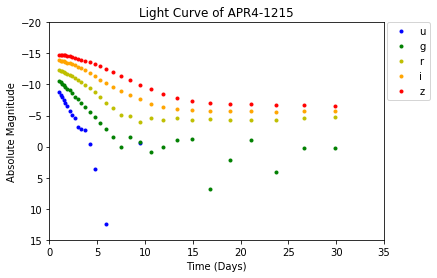

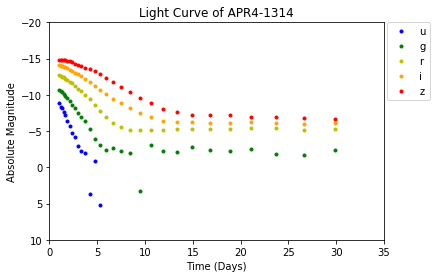

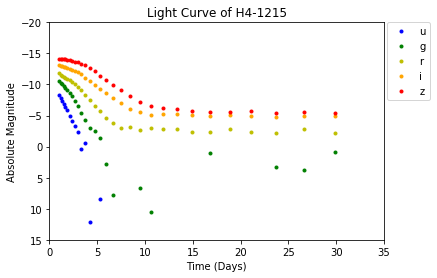

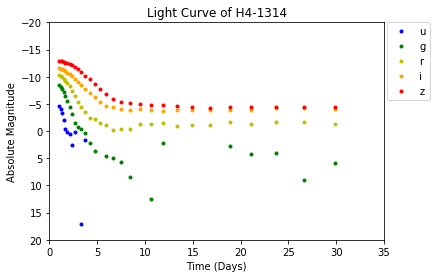

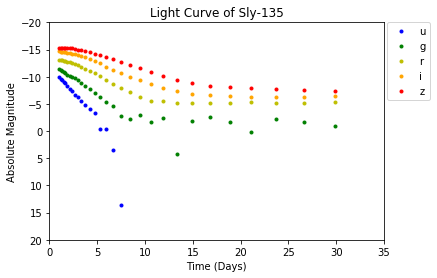

In [299]:
abs_plotter(APR1215, "APR4-1215")
abs_plotter(APR1314, "APR4-1314")
abs_plotter(H41215, "H4-1215")
abs_plotter(H41314, "H4-1314")
abs_plotter(Sly135, "Sly-135")

### NS-BH Mergers

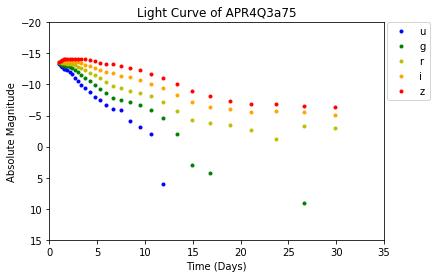

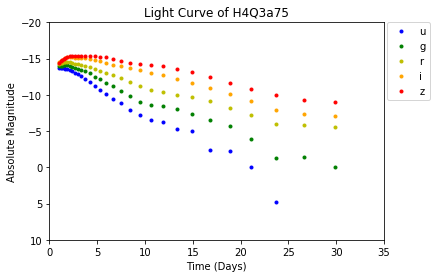

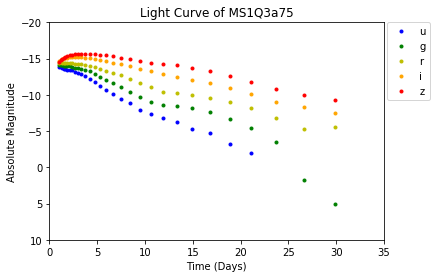

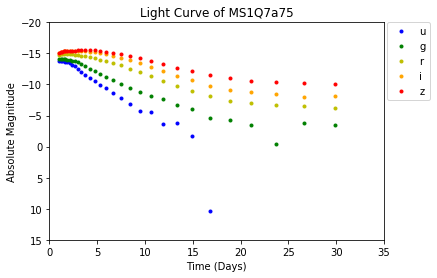

In [300]:
abs_plotter(APR4Q3a75, 'APR4Q3a75')
abs_plotter(H4Q3a75, 'H4Q3a75')
abs_plotter(MS1Q3a75, 'MS1Q3a75')
abs_plotter(MS1Q7a75, 'MS1Q7a75')

In [313]:
from scipy.interpolate import interp1d
    
def abs_interp(merger):
    approx='cubic'
    u=interp1d(merger['day'][np.isfinite(merger['u'])], merger['u'][np.isfinite(merger['u'])], kind=approx)
    g=interp1d(merger['day'][np.isfinite(merger['g'])], merger['g'][np.isfinite(merger['g'])], kind=approx)
    r=interp1d(merger['day'][np.isfinite(merger['r'])], merger['r'][np.isfinite(merger['r'])], kind=approx)
    i=interp1d(merger['day'][np.isfinite(merger['i'])], merger['i'][np.isfinite(merger['i'])], kind=approx)
    z=interp1d(merger['day'][np.isfinite(merger['z'])], merger['z'][np.isfinite(merger['z'])], kind=approx)
    return [u, g, r, i, z]

def abs_plot_interp(merger, name):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.plot(day_new(merger, 'u'), abs_interp(merger)[0](day_new(merger, 'u')), 'b--', label='u interp.')
    ax.plot(day_new(merger, 'g'), abs_interp(merger)[1](day_new(merger, 'g')), 'g--', label='g interp.')
    ax.plot(day_new(merger, 'r'), abs_interp(merger)[2](day_new(merger, 'r')), 'y--', label='r interp.')
    ax.plot(day_new(merger, 'i'), abs_interp(merger)[3](day_new(merger, 'i')), '--', color='orange', label='i interp.')
    ax.plot(day_new(merger, 'z'), abs_interp(merger)[4](day_new(merger, 'z')), 'r--', label='z interp.')
    ax.axis([0,35,rounded_up(correct_max(merger))+5,(rounded_down(correct_min(merger))-5)])
    plt.title("Light Curve of" + " " + name)
    plt.xlabel("Time (Days)")
    plt.ylabel("Absolute Magnitude")
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    return

def day_new(merger, band):
    set_length=100
    day_new = np.linspace(min(merger['day'][np.isfinite(merger[band])]),
                          max(merger['day'][np.isfinite(merger[band])]),set_length)
    return day_new





### NS-NS Interpolations

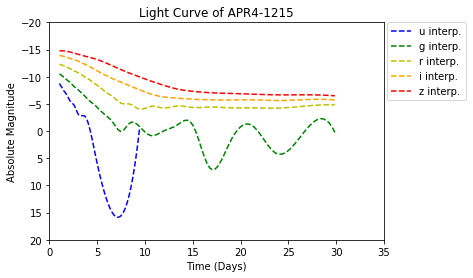

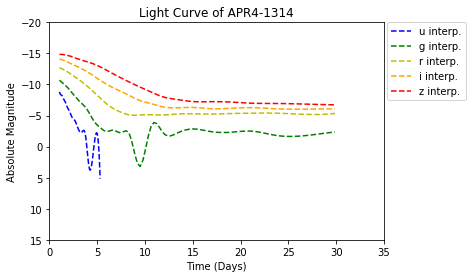

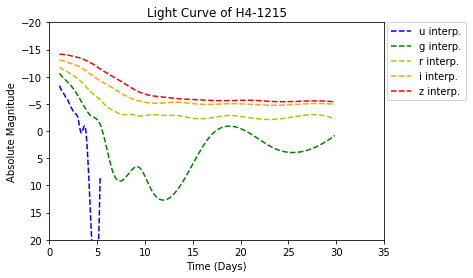

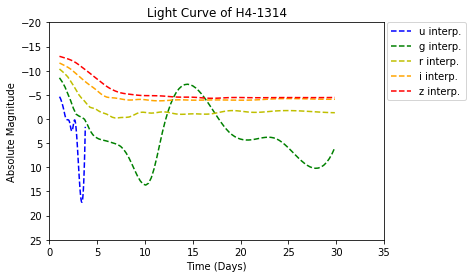

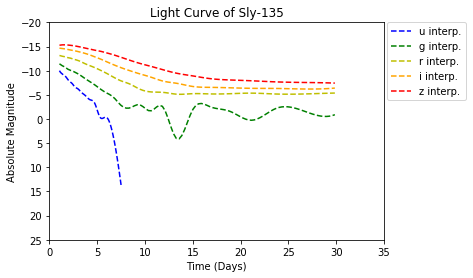

In [314]:
abs_plot_interp(APR1215, "APR4-1215")
abs_plot_interp(APR1314, "APR4-1314")
abs_plot_interp(H41215, "H4-1215")
abs_plot_interp(H41314, "H4-1314")
abs_plot_interp(Sly135, "Sly-135")

### NS-BH Interpolations

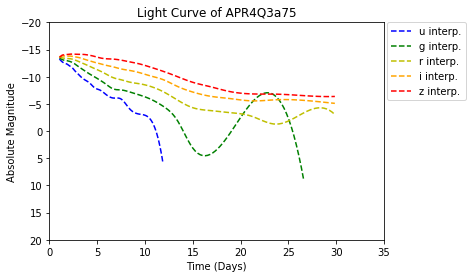

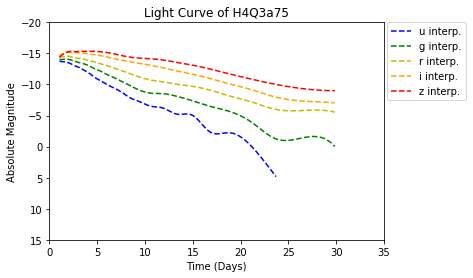

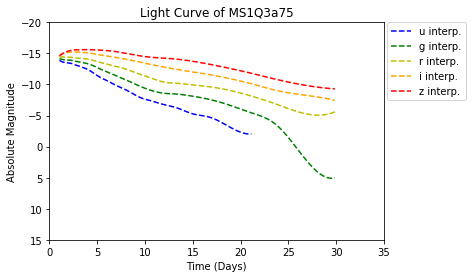

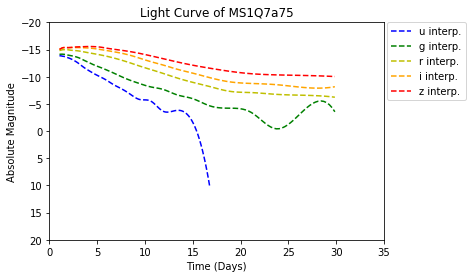

In [315]:
abs_plot_interp(APR4Q3a75, 'APR4Q3a75')
abs_plot_interp(H4Q3a75, 'H4Q3a75')
abs_plot_interp(MS1Q3a75, 'MS1Q3a75')
abs_plot_interp(MS1Q7a75, 'MS1Q7a75')

## Combining the Data with the Interpolations

In [316]:
def full_plot(merger,name):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    abs_plotter1(merger)
    abs_plot_interp(merger)
    ax.axis([0,35,rounded_up(correct_max(merger))+5,(rounded_down(correct_min(merger))-5)])
    plt.title("Light Curve of" + " " + name)
    plt.xlabel("Time (Days)")
    plt.ylabel("Absolute Magnitude")
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    return

def abs_plotter1(merger):
    plt.plot(merger['day'], merger['u'], 'b.', label='u')
    plt.plot(merger['day'], merger['g'], 'g.', label='g')
    plt.plot(merger['day'], merger['r'], 'y.', label='r')
    plt.plot(merger['day'], merger['i'], '.', color='orange', label='i')
    plt.plot(merger['day'], merger['z'], 'r.', label='z')
    return

def abs_plot_interp(merger):
    plt.plot(day_new(merger, 'u'), abs_interp(merger)[0](day_new(merger, 'u')), 'b--', label='u interp.')
    plt.plot(day_new(merger, 'g'), abs_interp(merger)[1](day_new(merger, 'g')), 'g--', label='g interp.')
    plt.plot(day_new(merger, 'r'), abs_interp(merger)[2](day_new(merger, 'r')), 'y--', label='r interp.')
    plt.plot(day_new(merger, 'i'), abs_interp(merger)[3](day_new(merger, 'i')), '--', color='orange', label='i interp.')
    plt.plot(day_new(merger, 'z'), abs_interp(merger)[4](day_new(merger, 'z')), 'r--', label='z interp.')
    return

### NS-NS Mergers Full Plots

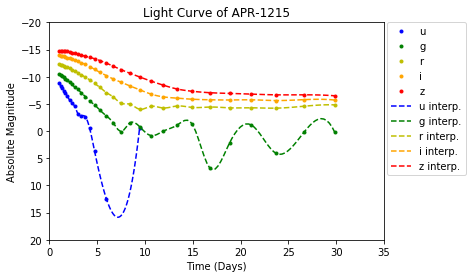

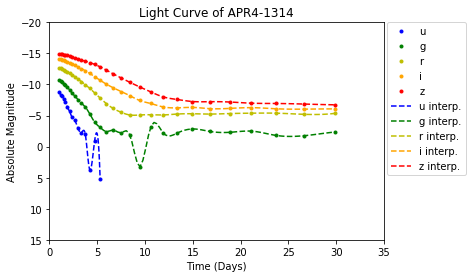

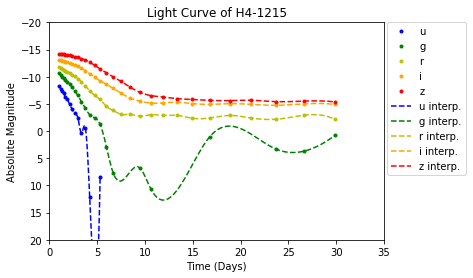

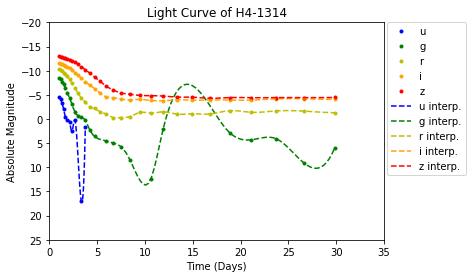

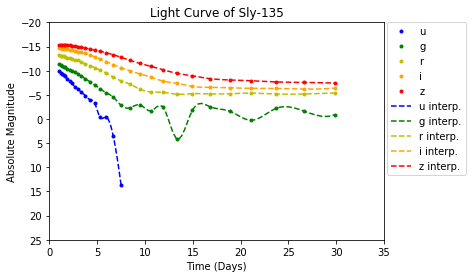

In [317]:
full_plot(APR1215, "APR-1215")
full_plot(APR1314, "APR4-1314")
full_plot(H41215, "H4-1215")
full_plot(H41314, "H4-1314")
full_plot(Sly135, "Sly-135")

### NS-BH Mergers Full Plots

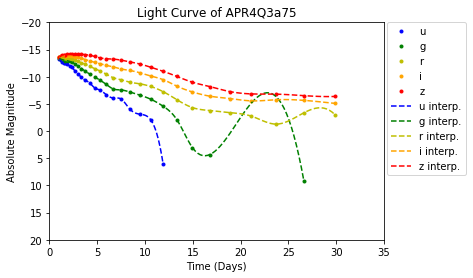

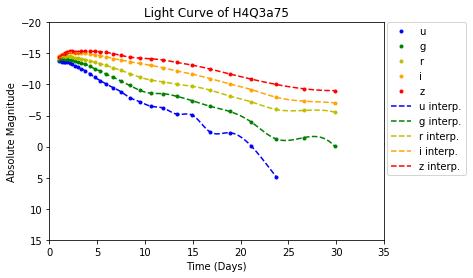

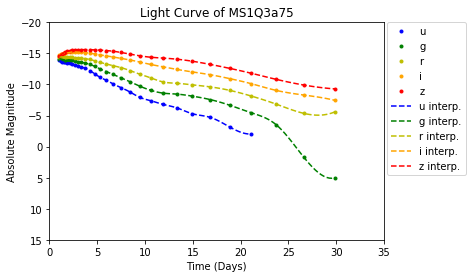

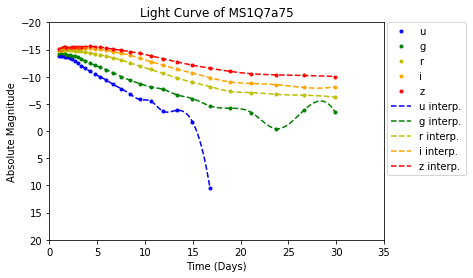

In [318]:
full_plot(APR4Q3a75, 'APR4Q3a75')
full_plot(H4Q3a75, 'H4Q3a75')
full_plot(MS1Q3a75, 'MS1Q3a75')
full_plot(MS1Q7a75, 'MS1Q7a75')